In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("catfish_wide_unit1.csv")

In [3]:
df.head()

,DATE,CatfishFarm Price,CatfishProcessor Price
0,1/1/1986,70.0,201.0
1,2/1/1986,70.0,199.0
2,3/1/1986,72.0,199.7
3,4/1/1986,74.0,207.1
4,5/1/1986,72.0,203.9


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True) #set date as index
df.head()

,CatfishFarm Price,CatfishProcessor Price
DATE,,
1986-01-01,70.0,201.0
1986-02-01,70.0,199.0
1986-03-01,72.0,199.7
1986-04-01,74.0,207.1
1986-05-01,72.0,203.9


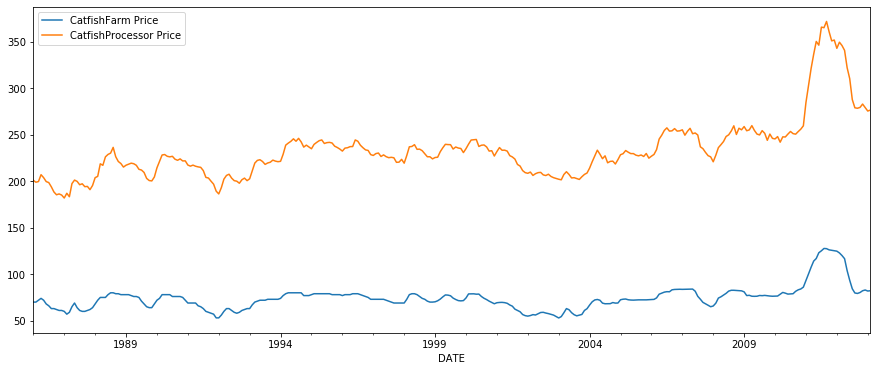

In [5]:
df.plot(figsize=(15,6))

In [6]:
x=df[df.columns[0:1]]
y=df[df.columns[1:2]]
x=x.rename(columns={'CatfishFarm Price': 'Price'})
y=y.rename(columns={'CatfishProcessor Price': 'Price'})

In [7]:
x.head(2)

,Price
DATE,
1986-01-01,70.0
1986-02-01,70.0


In [8]:
x.index.inferred_freq

'MS'

In [9]:
y.head(2)

,Price
DATE,
1986-01-01,201.0
1986-02-01,199.0


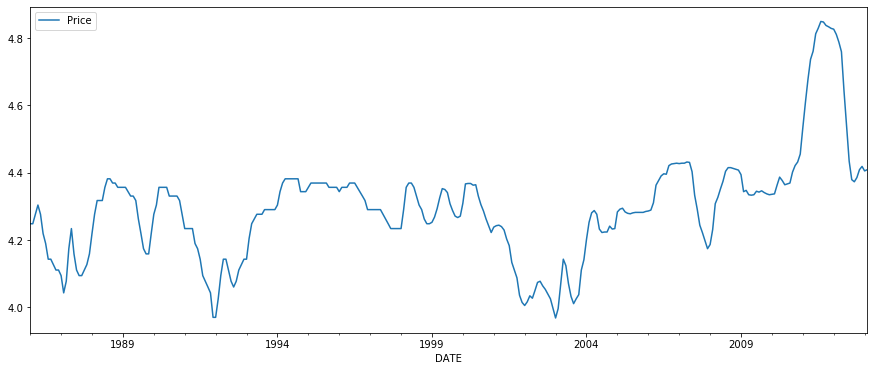

In [10]:
#x=np.log(x)
df_trans=np.log(x)
df_trans.plot(figsize=(15,6))

# Auto ARIMA 

In [11]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import log
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from dateutil.parser import parse


import pmdarima as pm
%matplotlib inline




no display found. Using non-interactive Agg backend


In [12]:
# test adfuller
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.601674
p-value: 0.005729


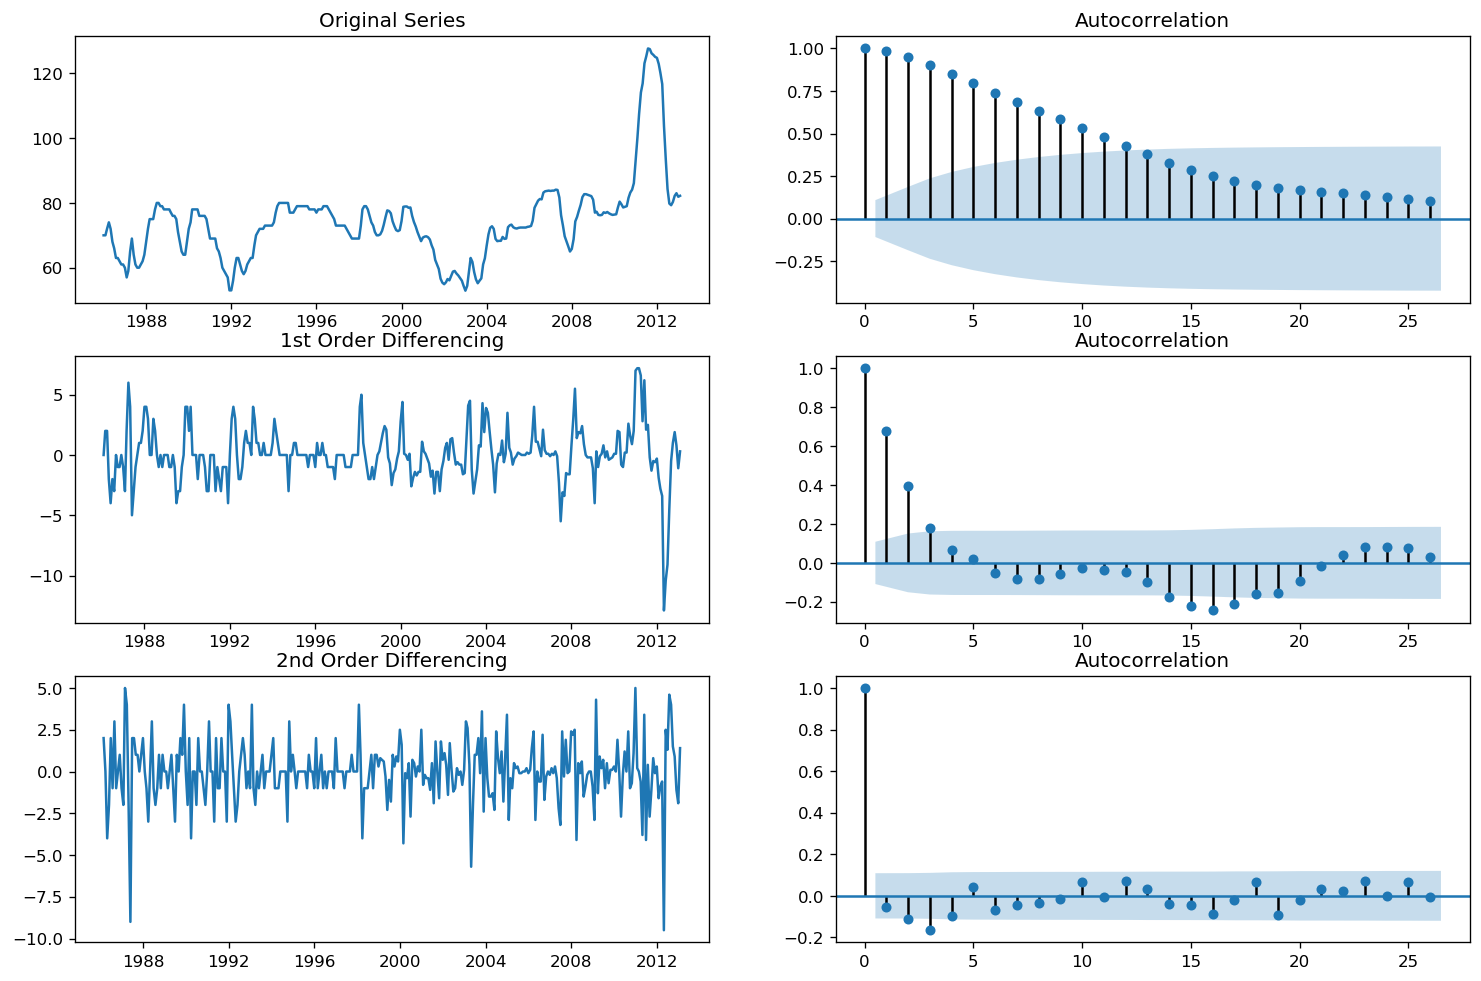

In [13]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})
df=x#.values
# Original Series
fig, axes = plt.subplots(3, 2)#, sharex=True)
axes[0, 0].plot(df); 
axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [14]:
# test diffs
from pmdarima.arima.utils import ndiffs
print(
ndiffs(x,test='adf'),
ndiffs(y, test='kpss'),
ndiffs(y, test='pp'))

1 1 1


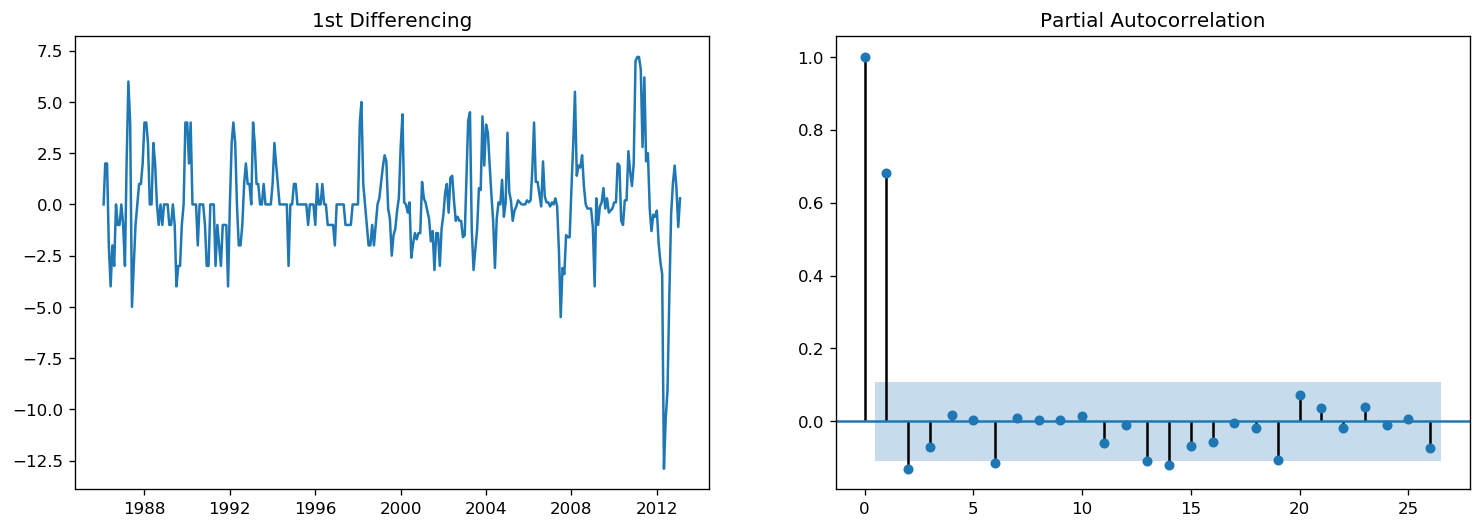

In [15]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)#, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,1))
plot_pacf(df.diff().dropna(), ax=axes[1])

plt.show()

In [16]:
# 1,1,2 ARIMA Model
df=x
model = ARIMA(df, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  325
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -620.370
Method:                       css-mle   S.D. of innovations              1.630
Date:                Mon, 18 May 2020   AIC                           1250.739
Time:                        08:22:24   BIC                           1269.658
Sample:                    02-01-1986   HQIC                          1258.290
                         - 02-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0363      0.241      0.151      0.880      -0.436       0.509
ar.L1.D.Price     0.4462      0.116      3.843      0.000       0.219       0.674
ma.L1.D.Price     0.3100      0.119     

In [17]:
# 1,1,1 ARIMA Model
df=x
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  325
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -621.893
Method:                       css-mle   S.D. of innovations              1.638
Date:                Mon, 18 May 2020   AIC                           1251.786
Time:                        08:22:27   BIC                           1266.922
Sample:                    02-01-1986   HQIC                          1257.827
                         - 02-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0385      0.259      0.148      0.882      -0.469       0.546
ar.L1.D.Price     0.5979      0.061      9.821      0.000       0.479       0.717
ma.L1.D.Price     0.1522      0.071     

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


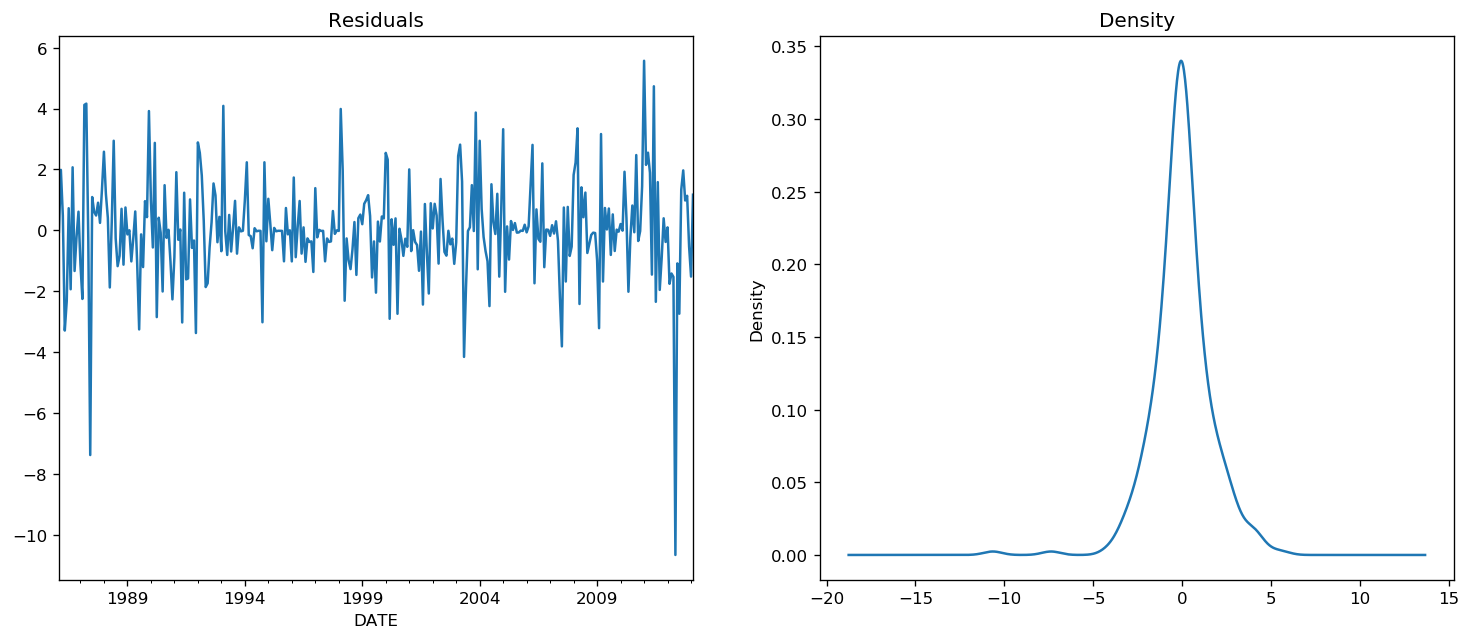

In [18]:
residuals=model_fit.resid
fig, ax = plt.subplots(1,2,figsize=(15,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

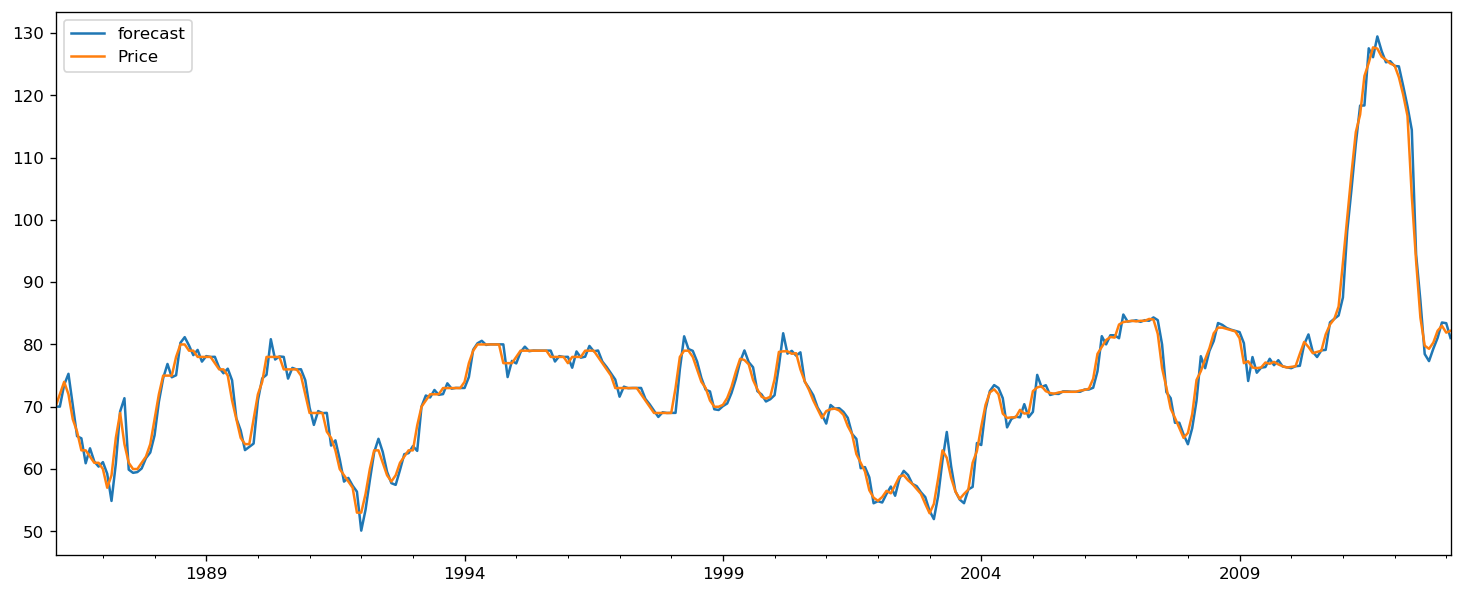

In [19]:
# Actual vs Fitted
fig,ax=plt.subplots(figsize=(15,6))
model_fit.plot_predict(dynamic=False,ax=ax)
plt.show()

In [20]:
# Create Training and Test
n=len(df)
ntra=302
ntes=n-ntra
train = df[:ntra]
test = df[ntra:]

In [21]:
train.index[-1]

Timestamp('2011-02-01 00:00:00')

In [22]:
test.index[0]

Timestamp('2011-03-01 00:00:00')

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


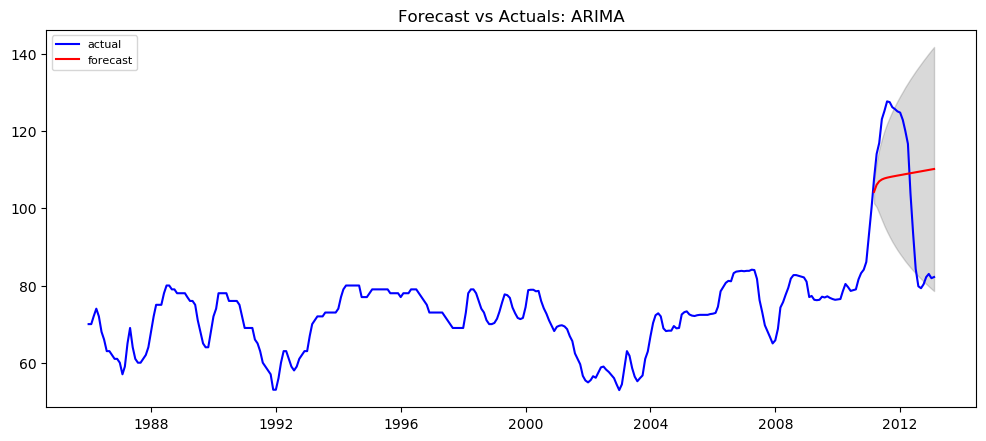

In [23]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
n_periods=ntes

#fc, confint = model.predict(n_periods, return_conf_int=True)
fc, se, confint = fitted.forecast(ntes, alpha=0.05)  # 95% conf
index_of_fc = test.index#[np.arange(len(train), len(train)+n_periods)]

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Forecast
##fc, se, conf = fitted.forecast(ntes, alpha=0.05)  # 95% conf
# Make as pandas series
##fc_series = pd.Series(fc, index=test.index)
##lower_series = pd.Series(conf[:, 0], index=test.index)
##upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train, label='training')
plt.plot(x, label='actual',color='blue')
#plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast',color='red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals: ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.savefig("ARIMA111.png")
plt.show()

In [24]:
model0 = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model0.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=1105.519, BIC=1120.347, Time=0.166 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1242.264, BIC=1249.678, Time=0.017 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=1112.628, BIC=1123.750, Time=0.068 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=1127.119, BIC=1138.240, Time=0.095 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1241.114, BIC=1244.821, Time=0.021 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=1105.029, BIC=1123.565, Time=0.123 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=1103.470, BIC=1118.299, Time=0.082 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=1105.006, BIC=1123.541, Time=0.150 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=1106.911, BIC=1129.154, Time=0.332 seconds
Total fit time: 1.074 seconds
                               SARIMAX Results                                
Dep. Variable:     

In [25]:
#model.plot_diagnostics(figsize=(15,10))
#plt.show()

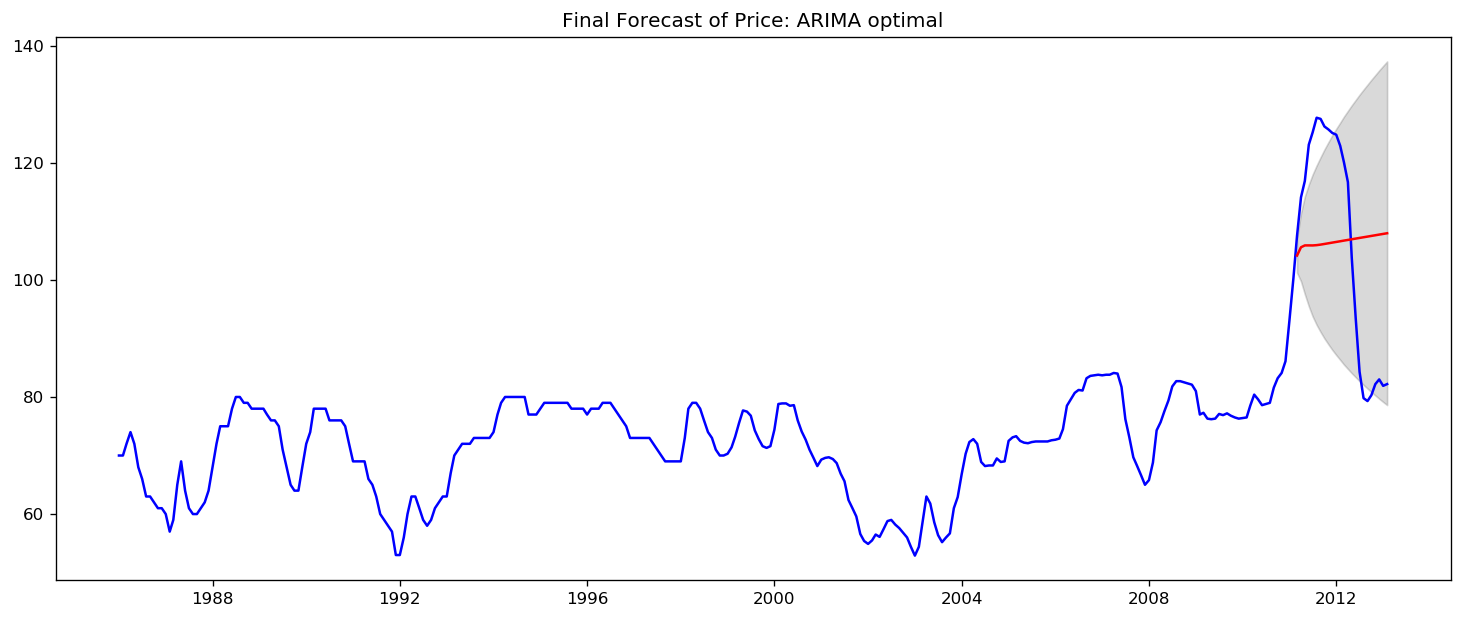

In [26]:
n_periods=ntes
fc, confint = model0.predict(n_periods=n_periods, return_conf_int=True)
#fc,se, confint = model.forecast(ntes, return_conf_int=True,alpha=0.05)
index_of_fc = test.index#np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))
plt.plot(x,color='blue')
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Price: ARIMA optimal")
plt.savefig('ARIMA.png')
plt.show()

# Auto SARIMA model

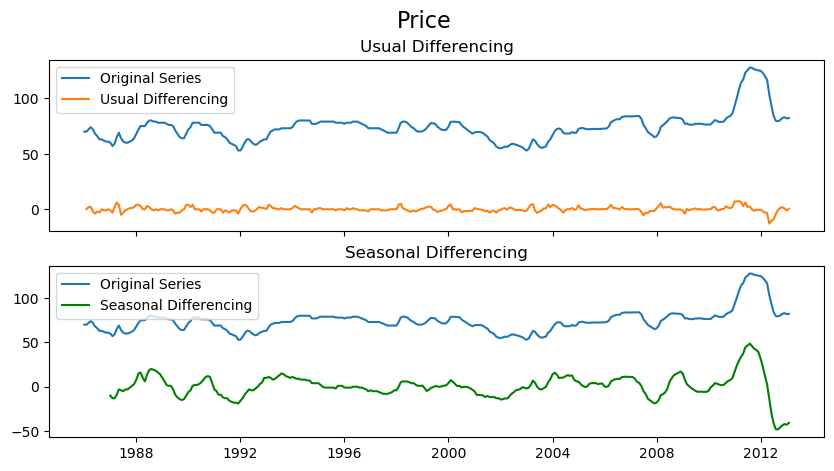

In [27]:
data=x
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Price', fontsize=16)
plt.show()

In [28]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=1085.092, BIC=1103.442, Time=3.781 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=2071.567, BIC=2078.907, Time=0.072 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=1272.254, BIC=1286.933, Time=1.397 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=1690.068, BIC=1704.747, Time=1.690 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=2071.472, BIC=2075.142, Time=0.038 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=1259.337, BIC=1274.016, Time=0.363 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=1085.179, BIC=1107.198, Time=2.995 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=1084.555, BIC=1106.574, Time=8.407 seconds
Near non-invertible roots for order (1, 0, 1)(0, 1, 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  302
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -530.147
Date:                            Mon, 18 May 2020   AIC                           1072.294
Time:                                    08:24:12   BIC                           1094.313
Sample:                                         0   HQIC                          1081.116
                                            - 302                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0160      0.013      1.211      0.226      -0.010       0.042
ar.L1          1.3948      0.083     16.796      0.000       1.232       1.558
ar.L2         -0.4198      0.083     -5.085      0.000      -0.582      -0.258
ma.L1          0.2029      0.094      2.167      0.030       0.019       0.386
ma.S.L12      -0.9994      7.026     -0.142      0.887     -14.769      12.771
sigma2         1.9663     13.770      0.143      0.886     -25.022      28.955
===================================================================================
Ljung-Box (Q):                       32.33   Jarque-Bera (JB):                44.53
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.17
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

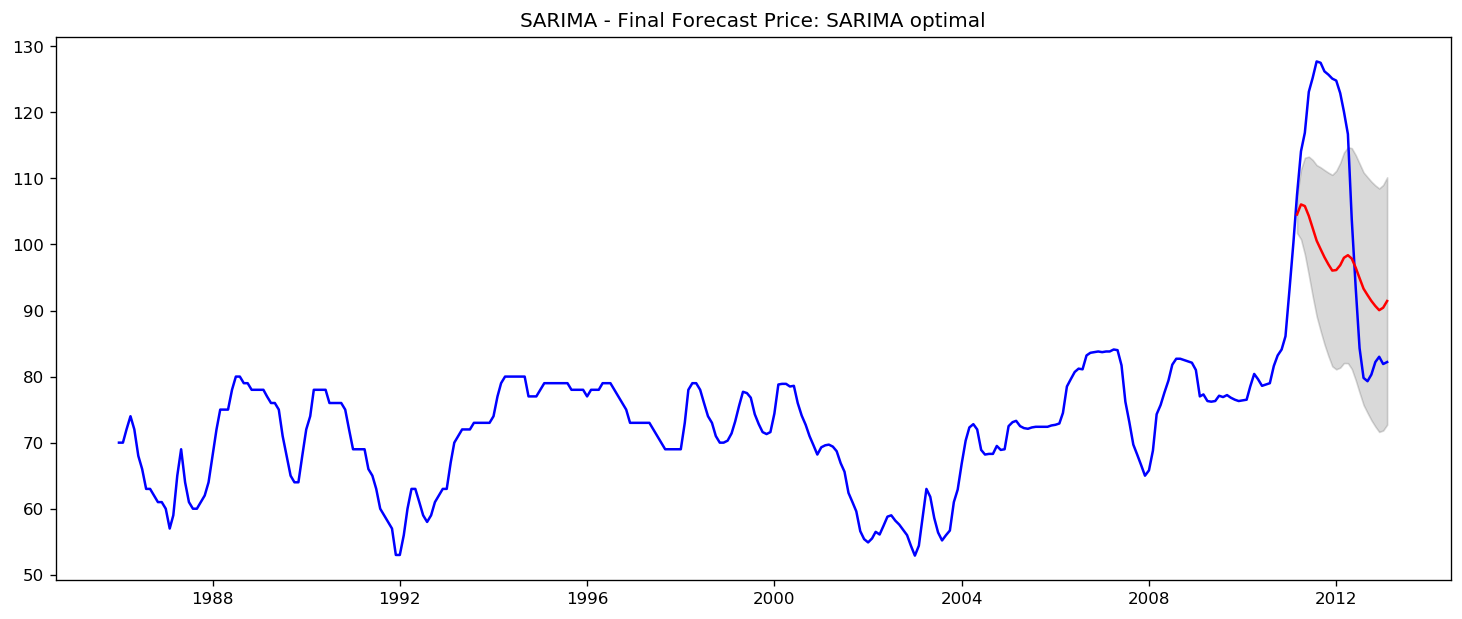

In [29]:
n_periods = ntes
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index#pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))
#plt.plot(data)
plt.plot(x,color='blue')
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast Price: SARIMA optimal")
plt.savefig('SARIMA.png')
plt.show()

# Auto SARIMAX model

In [30]:
# multiplicative seasonal component
result_mul = seasonal_decompose(train,   # 2 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
train['month'] = train.index.month
df = pd.merge(train, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = train.index  # reassign the index.

In [31]:
df.head()

,value,month,seasonal_index
DATE,,,
1986-01-01,70.0,1,0.983581
1986-02-01,70.0,2,1.003230
1986-03-01,72.0,3,1.019195
1986-04-01,74.0,4,1.034031
1986-05-01,72.0,5,1.034973


In [32]:
#The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model
# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()




Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=1087.092, BIC=1109.112, Time=4.696 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=2073.567, BIC=2084.577, Time=0.111 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=1274.254, BIC=1292.603, Time=1.796 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=1692.068, BIC=1710.417, Time=2.151 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=2073.472, BIC=2080.812, Time=0.404 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=1261.337, BIC=1279.686, Time=0.502 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=1087.179, BIC=1112.868, Time=3.626 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=1086.557, BIC=1112.246, Time=9.270 seconds
Near non-invertible roots for order (1, 0, 1)(0, 1, 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  302
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -530.147
Date:                            Mon, 18 May 2020   AIC                           1074.295
Time:                                    08:27:10   BIC                           1099.984
Sample:                                01-01-1986   HQIC                          1084.587
                                     - 02-01-2011                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0160      0.013      1.198      0.231      -0.010       0.042
seasonal_index     0.0057   1.28e+04    4.5e-07      1.000    -2.5e+04     2.5e+04
ar.L1              1.3941      0.083     16.787      0.000       1.231       1.557
ar.L2             -0.4190      0.083     -5.075      0.000      -0.581      -0.257
ma.L1              0.2036      0.094      2.170      0.030       0.020       0.388
ma.S.L12          -0.9988      3.736     -0.267      0.789      -8.321       6.323
sigma2             1.9664      7.302      0.269      0.788     -12.346      16.278
===================================================================================
Ljung-Box (Q):                       32.34   Jarque-Bera (JB):                44.47
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.17
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

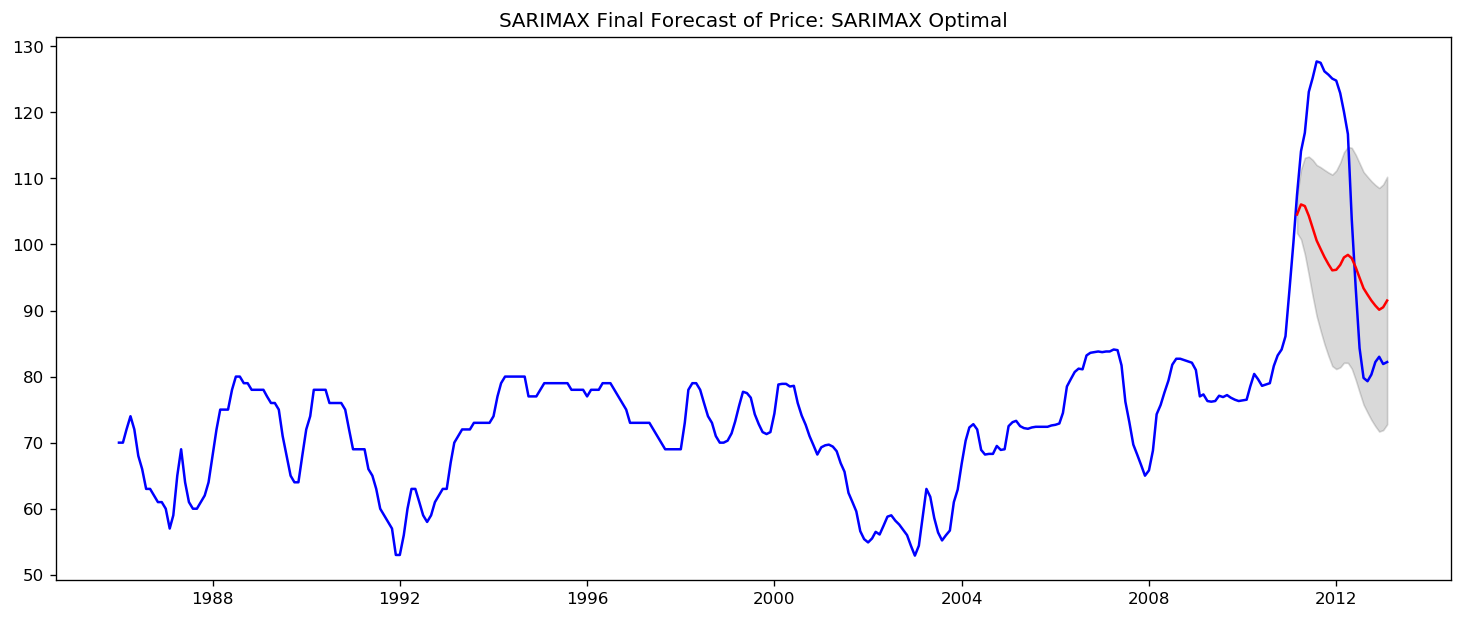

In [33]:
# Forecast
n_periods = ntes
result_mul_test = seasonal_decompose(test,model='multiplicative', extrapolate_trend='freq')

seasonal_index = result_mul_test.seasonal.to_frame()

fitted, confint = sxmodel.predict(n_periods=n_periods,
                                  exogenous=np.tile(seasonal_index.values, 1).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(test.index[0], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))
plt.plot(x,color='blue')
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Final Forecast of Price: SARIMAX Optimal")
plt.savefig('SARIMAX.png')
plt.show()

# END

# UNVARIATE FOR TREND REASON

In [13]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary
import math
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

no display found. Using non-interactive Agg backend


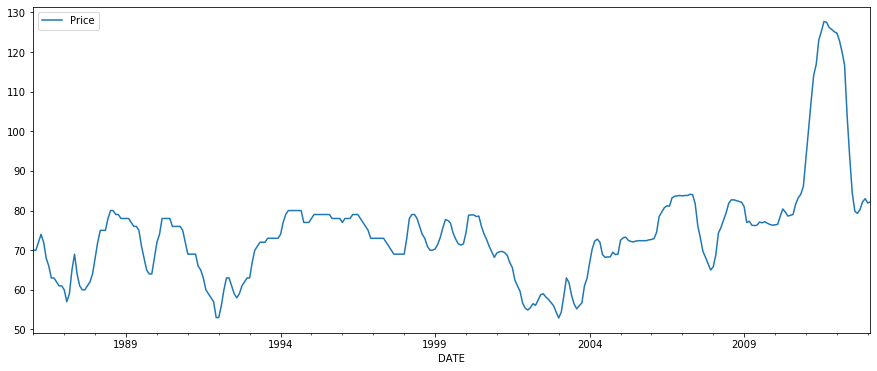

In [14]:
x.plot(figsize=(15,6))
plt.show()

In [20]:
#result = seasonal_decompose(df, model='additive',freq=7)
#result.plot()
#plt.show()
sd_add=seasonal_decompose(x,model='additive')

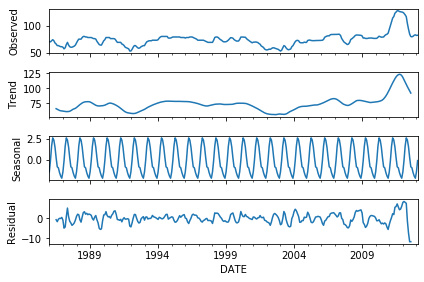

In [27]:
sd_add.plot()
plt.show()

In [22]:
sd_mul=seasonal_decompose(x,model='multiplicative')

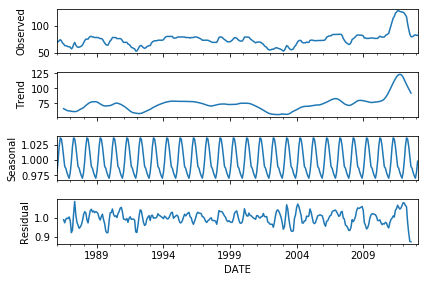

In [26]:
sd_mul.plot()
plt.show()

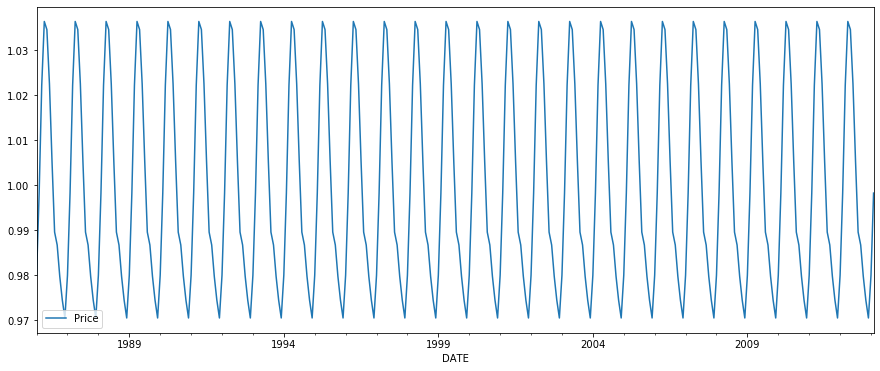

In [28]:
#plt.plot(sd_mul.trend)
sd_mul.seasonal.plot(figsize=(15,6))
#plt.plot(sd_mul.resid)
plt.show()

In [29]:
#sd.resid
#sd.seasonal
#sd.trend

# ARIMA model (only)

In [30]:
nt=np.int(0.8*len(x))
train=x[:nt]
test=x[nt:]

In [58]:
#freq: ‘B’, ‘D’, ‘W’, ‘M’, ‘A’, or ‘Q’.
'''
Alias   Description
B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T, min  minutely frequency
S       secondly frequency
L, ms   milliseonds
U, us   microseconds
N       nanoseconds
'''
model = ARIMA(train, order=(3,1,2),freq='MS')

In [59]:
model = ARIMA(train, order=(3,1,2),freq='MS')

In [60]:
model_fit = model.fit(disp=-1)

In [61]:
model_fit.predict(start=1,end=nt)

1986-02-01    0.016407
1986-03-01    0.007023
1986-04-01    1.418040
1986-05-01    1.003052
1986-06-01   -1.823913
                ...   
2007-05-01    0.181604
2007-06-01   -0.145874
2007-07-01   -1.578615
2007-08-01   -3.318658
2007-09-01   -0.935307
Freq: MS, Length: 260, dtype: float64

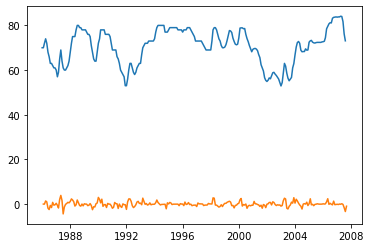

In [48]:
plt.plot(train)
#plt.plot(model_fit.fittedvalues, color='red')
plt.plot(model_fit.predict(start=1,end=nt))
plt.show()

# Find trend

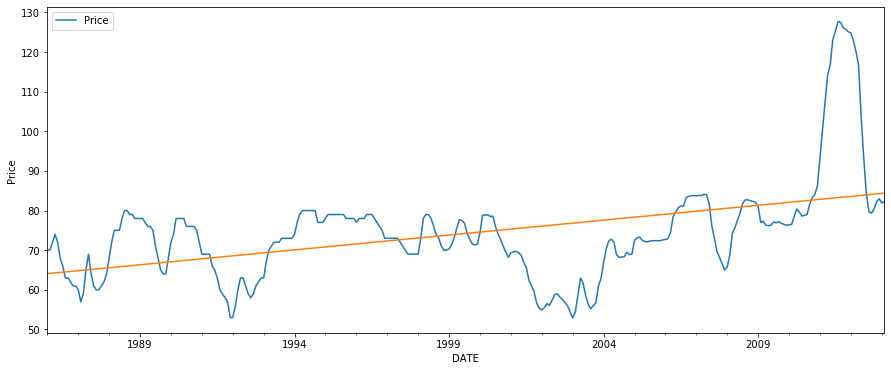

In [42]:
x_df=tsatools.add_trend(x,trend='ct')
x_lm=sm.ols(formula='Price ~ trend',data=x_df).fit()
ax = x.plot(figsize=(15,6))
ax.set_xlabel('Time')
ax.set_ylabel("Price")
x_lm.predict(x_df).plot(ax=ax)
plt.show()

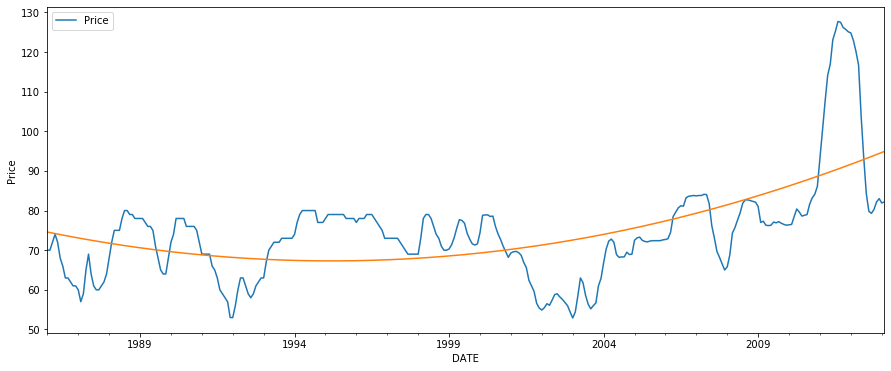

In [44]:
x_df=tsatools.add_trend(x,trend='ctt')
x_lm=sm.ols(formula='Price ~ trend+trend_squared',data=x_df).fit()
ax = x.plot(figsize=(15,6))
ax.set_xlabel('Time')
ax.set_ylabel("Price")
x_lm.predict(x_df).plot(ax=ax)
plt.show()

# Model with Seasonality

In [55]:
x_df = tsatools.add_trend(x, trend='c')

In [56]:
x_df['Month'] = x_df.index.month

In [57]:
x_lm_season = sm.ols(formula='Price~ C(Month)',data=x_df).fit()

In [58]:
x_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.4056
Date:                Sat, 16 May 2020   Prob (F-statistic):              0.953
Time:                        20:59:30   Log-Likelihood:                -1297.0
No. Observations:                 326   AIC:                             2618.
Df Residuals:                     314   BIC:                             2663.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         73.0179      2.490     29.329      0.000      68.119      77.916
C(Month)[T.2]      1.2857      3.521      0.365      0.715      -5.642       8.213
C(Month)[T.3]      2.7377      3.553      0.770      0.442      -4.254       9.729
C(Month)[T.4]      3.8007      3.553      1.070      0.286      -3.191      10.792
C(Month)[T.5]      3.5377      3.553      0.996      0.320      -3.454      10.529
C(Month)[T.6]      2.6710      3.553      0.752      0.453      -4.320       9.662
C(Month)[T.7]      1.4970      3.553      0.421      0.674      -5.494       8.488
C(Month)[T.8]      0.4710      3.553      0.133      0.895      -6.520       7.462
C(Month)[T.9]      0.0562      3.553      0.016      0.987      -6.935       7.047
C(Month)[T.10]    -0.2993      3.553     -0.084      0.933      -7.291       6.692
C(Month)[T.11]    -0.5030      3.553     -0.142      0.888      -7.494       6.488
C(Month)[T.12]    -0.6290      3.553     -0.177      0.860      -7.620       6.362
==============================================================================
Omnibus:                      153.131   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.218
Skew:                           1.986   Prob(JB):                    3.32e-158
Kurtosis:                       9.133   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

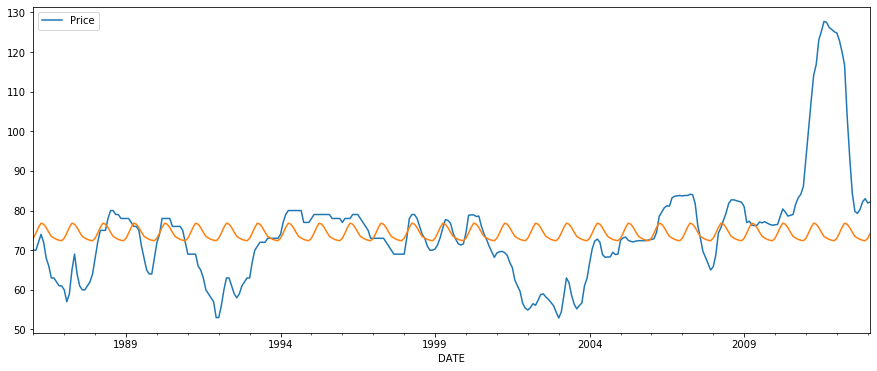

In [59]:
ax = x.plot(figsize=(15,6))
x_lm_season.predict(x_df).plot(ax=ax)
plt.show()

In [60]:
formula = 'Price ~ trend + np.square(trend) + C(Month)'

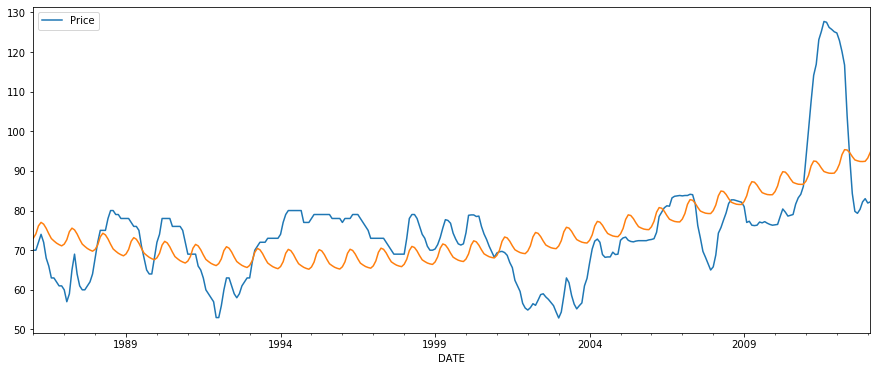

In [69]:
x_df = tsatools.add_trend(x, trend='ct')
x_df['Month'] = x_df.index.month
lm_trendseason = sm.ols(formula='Price~ trend + np.square(trend) + C(Month)',data=x_df).fit()
ax = x.plot(figsize=(15,6))
lm_trendseason.predict(x_df).plot(ax=ax)
plt.show()

# ARIMA

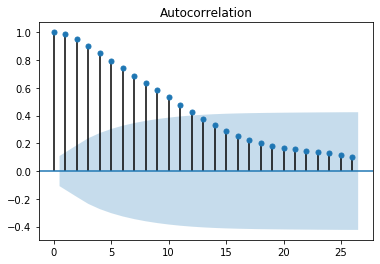

In [70]:
tsaplots.plot_acf(x.Price)
plt.show()

In [72]:
# freq. A Pandas offset or ‘B’, ‘D’, ‘W’, ‘M’, ‘A’, or ‘Q’. This is optional if dates are given.
train_res_arima = ARIMA(lm_trendseason.resid, order=(1, 0,0),freq='MS').fit(trend='nc')

In [78]:
forecast, xx, conf_int = train_res_arima.forecast(1)

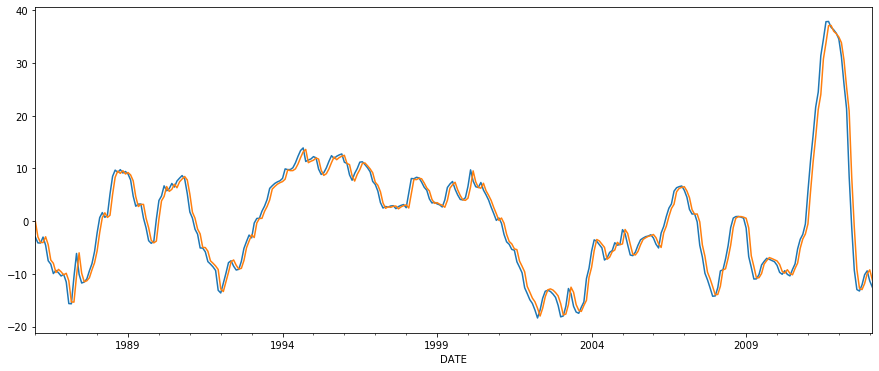

In [74]:
ax=lm_trendseason.resid.plot(figsize=(15,6))
train_res_arima.fittedvalues.plot(ax=ax)
plt.show()

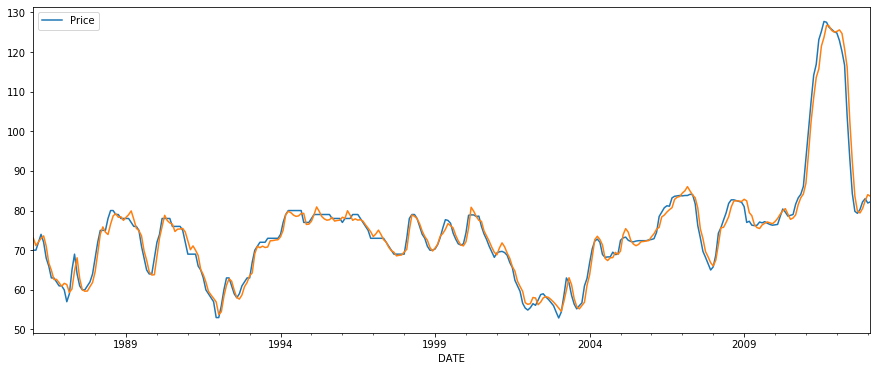

In [77]:
ax=x.plot(figsize=(15,6))
fc=lm_trendseason.predict(x_df)+train_res_arima.fittedvalues
fc.plot(ax=ax)
plt.show()

In [89]:
forecast, stderr, conf_int = train_res_arima.forecast(10)

In [87]:
forecast

array([-12.27150124, -12.02574632, -11.78491301, -11.54890274,
       -11.31761893, -11.09096692, -10.86885394, -10.65118911,
       -10.43788334, -10.22884933])

In [90]:
stderr

array([2.0503914 , 2.87080287, 3.48120993, 3.9802504 , 4.40662199,
       4.78042354, 5.11374729, 5.41457321, 5.68851558, 5.93971469])

In [100]:
conf_int

array([[-16.29019454,  -8.25280793],
       [-17.65241655,  -6.39907609],
       [-18.6079591 ,  -4.96186692],
       [-19.35005019,  -3.7477553 ],
       [-19.95443932,  -2.68079854],
       [-20.46042489,  -1.72150894],
       [-20.89161446,  -0.84609343],
       [-21.26355759,  -0.03882063],
       [-21.58716901,   0.71140233],
       [-21.8704762 ,   1.41277755]])

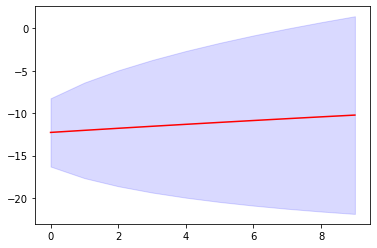

In [110]:
plt.plot(forecast,c='red')
plt.fill_between(range(len(forecast)),conf_int[:,0],conf_int[:,1],alpha=0.15,color='blue')
plt.show()

# Practical y

In [319]:
#y=x
#y=y.rename(columns={'CatfishProcessor Price': 'Price'})

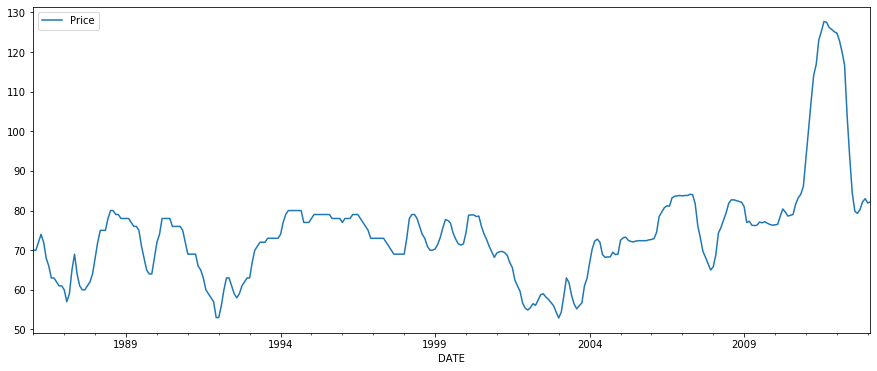

In [325]:
y.plot(figsize=(15,6))

In [386]:
n=len(y)
nt=315#np.int(0.9*n) # 80% & 20%
train=y.iloc[:nt]
test=y.iloc[nt:]

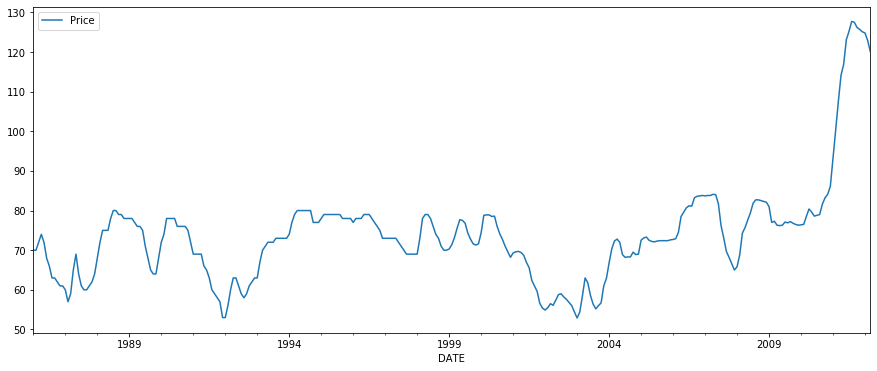

In [387]:
train.plot(figsize=(15,6))

# Find linear trend seasonal (Month)

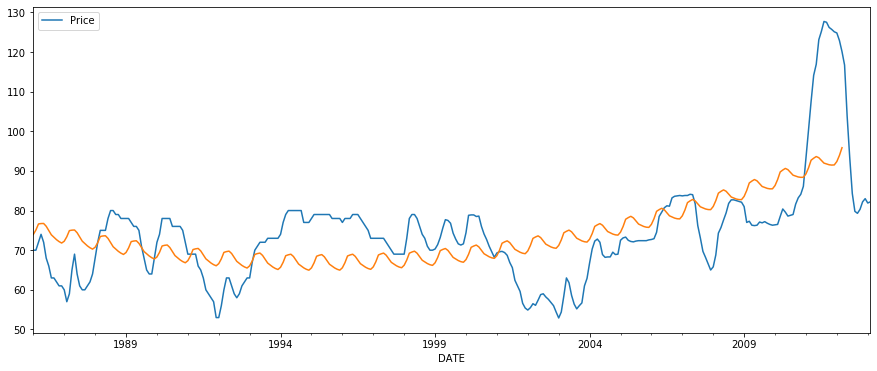

In [429]:
''' trend  {‘n’, ‘c’, ‘t’, ‘ct’, ‘ctt’}
The trend to add.
‘n’ add no trend.
‘c’ add constant only.
‘t’ add trend only.
‘ct’ add constant and linear trend.
‘ctt’ add constant and linear and quadratic trend
''' 
y_df = tsatools.add_trend(train, trend='t')
y_df['Month'] = y_df.index.month
trendseason = sm.ols(formula='Price~ trend + np.square(trend) + C(Month)',data=y_df).fit()
#trendseason = sm.ols(formula='Price~ trend + C(Month)',data=y_df).fit()
ax = y.plot(figsize=(15,6))
trendseason.predict(y_df).plot(ax=ax)
plt.show()

# trend residuals 

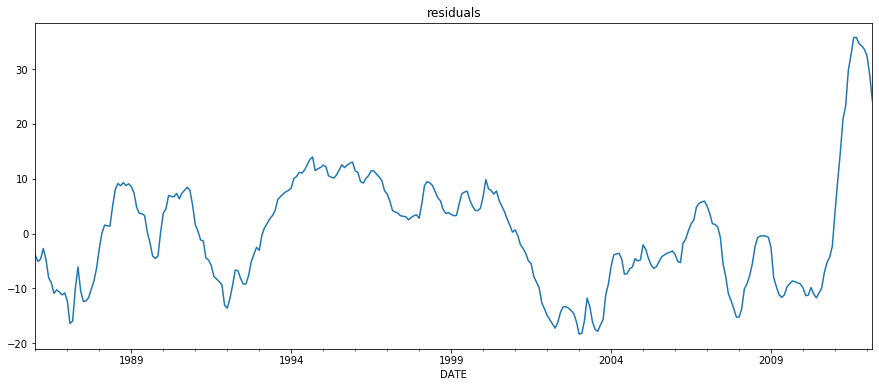

In [430]:
res=trendseason.resid
trend=trendseason.predict(y_df)


ax=res.plot(figsize=(15,6))
#trend.plot(ax=ax)
#train.plot(ax=ax)
plt.title("residuals")
plt.show()

In [431]:
# Test stationary
from termcolor import colored
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    adft = adfuller(timeseries,autolag='AIC')
    p_value=adft[1]
    return p_value

In [432]:
p_value=test_stationarity(res)
if (p_value<0.05):
    print(colored('res' +" is Stationary",'green') )
else:
    print(colored('res' +" is not Stationary",'red') )

res is Stationary


# fit residual

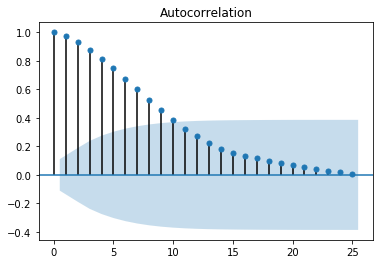

In [433]:
tsaplots.plot_acf(res)
plt.show()

In [434]:
#trend {‘c’,’nc’}  ‘c’ includes constant, ‘nc’ no constant.
res_arima = ARIMA(res, order=(1, 0,1),freq='MS').fit(trend='nc')

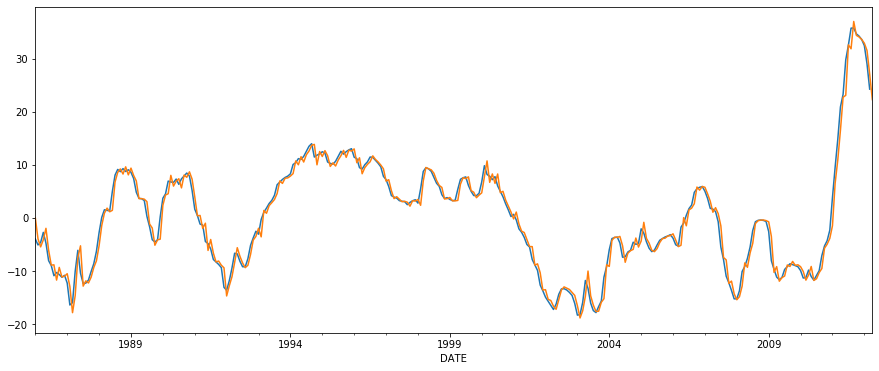

In [435]:
ax=res.plot(figsize=(15,6))
#res_arima.fittedvalues.plot(ax=ax)
predict=res_arima.predict(start=0,end=nt)
predict.plot(ax=ax)
plt.show()

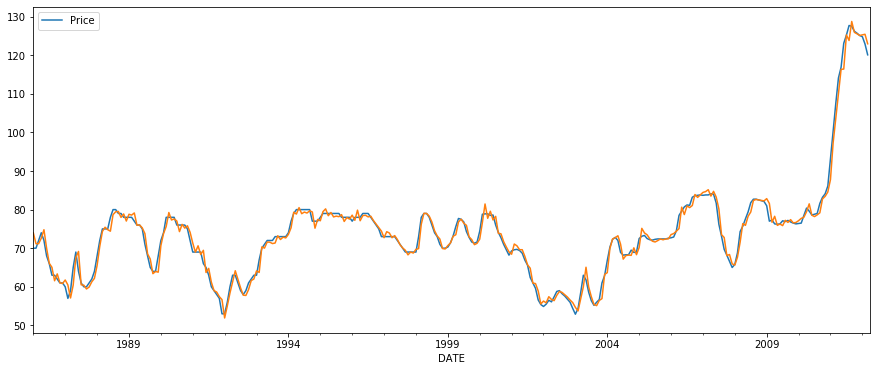

In [436]:
ax=train.plot(figsize=(15,6))
fc=trend+predict
fc.plot(ax=ax)
plt.show()

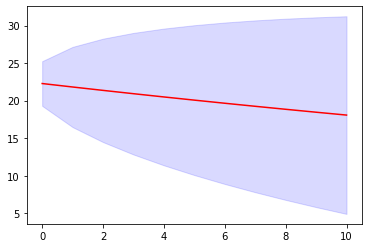

In [439]:
forecast, stderr, conf_int = res_arima.forecast(n-nt)
plt.plot(forecast,c='red')
plt.fill_between(range(len(forecast)),conf_int[:,0],conf_int[:,1],alpha=0.15,color='blue')
plt.show()

In [441]:
test_df = tsatools.add_trend(test, trend='t')
test_df['Month'] = test_df.index.month

In [442]:
y_df = tsatools.add_trend(y, trend='t')
y_df['Month'] = y_df.index.month
fc_trend=trendseason.predict(y_df)
#ax=fc_trend.plot(figsize=(15,6))
test_trend=fc_trend.iloc[nt:]
#test_trend.plot(ax=ax)

In [443]:
forecast, stderr, conf_int = res_arima.forecast(n-nt)
forecast=forecast+test_trend
conf_int[:,0]=conf_int[:,0]+test_trend
conf_int[:,1]=conf_int[:,1]+test_trend

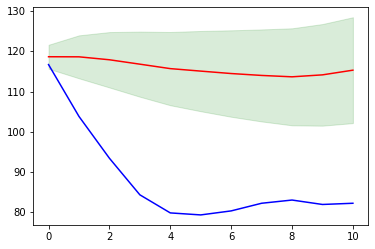

In [444]:
plt.plot(forecast.values,c='red')
plt.plot(test['Price'].values,c='blue')
plt.fill_between(range(len(forecast)),conf_int[:,0],conf_int[:,1],alpha=0.15,color='green')
plt.show()

In [426]:
test_predict=res_arima.predict(start=nt,end=n)

In [427]:
test_forecast=test_predict+test_trend

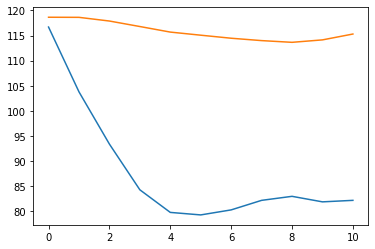

In [428]:
plt.plot(test['Price'].values)
plt.plot(test_forecast.values)
plt.show()